#### GA Visualizations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

from GA_param_function_module import *
from GA_visualizations_module import *
from GA_params_test import GeneticAlgorithm

In [87]:
cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expression = 1

ga = GeneticAlgorithm(
    cnn_model_path=cnn_model_path,
    masked_sequence=masked_sequence,
    target_expression=target_expression,
    islands=3,
    pop_size=10,
    generations=100,
)
best_sequences, best_predictions, fitness_histories, population_histories = ga.run(2)
print('\nBest infilled sequences:', best_sequences)
print('Predicted transcription rates:', best_predictions)

Lineage 1 | Island 1 | Generation 1 | Best TX rate: 0.3840 | Sequence: AATACTAGAGGTCTTCCGACTGGAGGTAAGGAATGAATATAATTGTATTTGTGTGGGCGGGAAGACAACTAGGGG | Children Not Added: 0
Lineage 1 | Island 2 | Generation 1 | Best TX rate: 0.4418 | Sequence: AATACTAGAGGTCTTCCGACATGGGGTTTAATGAATAACTGAGTAAAATTGTGTGGGCGGGAAGACAACTAGGGG | Children Not Added: 0
Lineage 1 | Island 3 | Generation 1 | Best TX rate: 0.3623 | Sequence: AATACTAGAGGTCTTCCGACGTACGGTGGGTAGGATATCCGAAATATGTTGTGTGGGCGGGAAGACAACTAGGGG | Children Not Added: 0
Lineage 1 | Island 1 | Generation 2 | Best TX rate: 0.3840 | Sequence: AATACTAGAGGTCTTCCGACTGGAGGTAAGGAATGAATATAATTGTATTTGTGTGGGCGGGAAGACAACTAGGGG | Children Not Added: 0
Lineage 1 | Island 2 | Generation 2 | Best TX rate: 0.4418 | Sequence: AATACTAGAGGTCTTCCGACATGGGGTTTAATGAATAACTGAGTAAAATTGTGTGGGCGGGAAGACAACTAGGGG | Children Not Added: 0
Lineage 1 | Island 3 | Generation 2 | Best TX rate: 0.3623 | Sequence: AATACTAGAGGTCTTCCGACGTACGGTGGGTAGGATATCCGAAATATGTTGTGTGGGCGGGAAGACAACTAGGG

In [90]:
population_histories[0][0]

[['ATTACTCCTTGACAAAACCATTACGTCTCT',
  'AATTTGACTTAATGGTCTGGTCCCCATGAA',
  'TGGAGGTAAGGAATGAATATAATTGTATTT'],
 ['AATTTGAGTTAATGGTCTGGTCCCCATGAA',
  'AATTTGACTTAATGGTCTGGTCCCCATGAA',
  'AATTTGACTTAATGGTCTGGTCCACATGAA'],
 ['AATTTGAGTTAATGGTCTGGTCCCCATGAA',
  'AATTTGAGTTAATGGTCTGGTCCACATGAA',
  'AATTTGAGTTAATGGTCTGGTCCCCATGAA'],
 ['AATTTGAGTTAATGGTCTAGTCCCCATGAA',
  'AATTTGAAATAATGGTATGGACCCCATGAA',
  'AATTTGAGGTAATAGTCTGGTCCCCATGAA'],
 ['AATTTGAGTTAATGGTCTAGTCCCCATGAA',
  'AATTTGAGTTAATGTCCTAGTCCCCATGAC',
  'AATTTGAGTTAATGGTCTAGTCCCCATGAA'],
 ['AATTTGAGTTAATGTCCTAGTCCCCATGAT',
  'AATTTGAGTTAATGTCCTAGTCCCCATGTC',
  'AATTTGAGTTAATGTCCTAGTCCCCATGAC'],
 ['AATTTGAGTTAATGTCCTAGTCGCCATGGC',
  'AATTTGAGTTAATGTCCTTGTCCCCATGGC',
  'AATTTGAGTTAATATCCTAGTCCCGATGTC'],
 ['AATTTGAGTAAATGTCCTAGTCGCCATGCC',
  'AATTTAAGTTAATGTCGTAGTCGCCATGGC',
  'AATTTGAGTTAATGTCCTAGTCGCCATGGC'],
 ['AATTTGAGTAAATGTCCTAGTCGCCATGCC',
  'TATTTGAGTAAATGTCCTAGTCGCTATCCC',
  'AATTCGAGTAAATGTCCTACTCGCCATGCC'],
 ['AATTTGAGTCAATGTC

In [18]:
def hamming_distance(seq1, seq2):
        return sum(el1 != el2 for el1, el2 in zip(seq1, seq2))

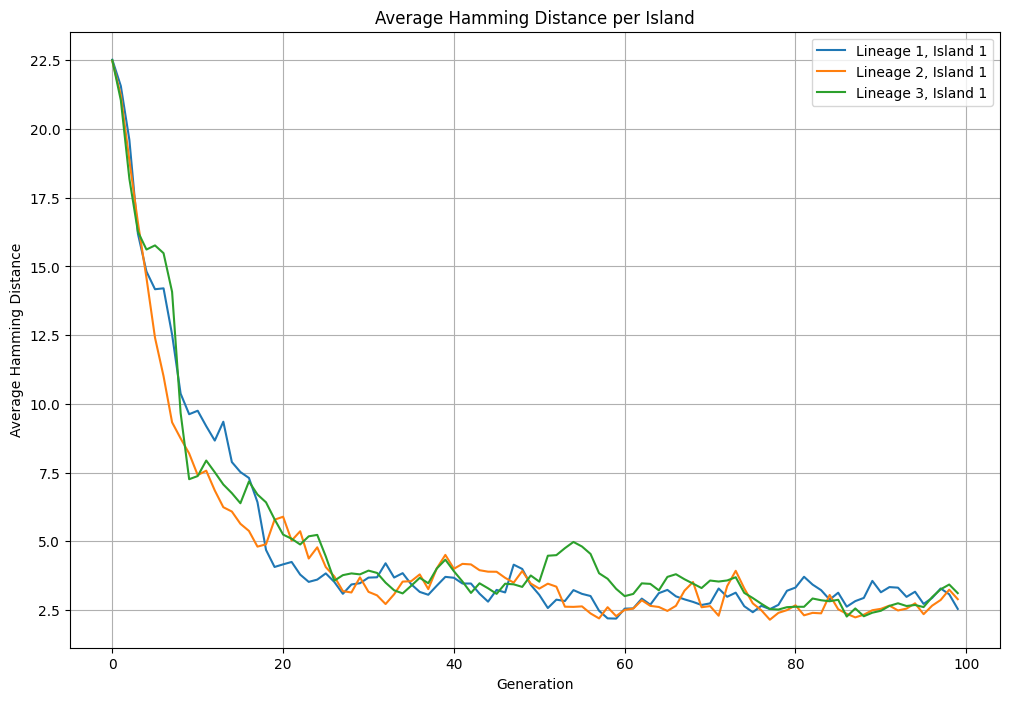

In [19]:
def plot_average_hamming_distance(population_histories):
    plt.figure(figsize=(12, 8))
    for lineage_idx, population_history in enumerate(population_histories):
        average_distances = [[] for _ in range(len(population_history))]
        
        for island_idx, generations in enumerate(population_history):
            for generation in generations:
                pairwise_distances = [
                    hamming_distance(seq1, seq2) 
                    for seq1, seq2 in combinations(generation, 2)
                ]
                avg_distance = np.mean(pairwise_distances) if pairwise_distances else 0
                average_distances[island_idx].append(avg_distance)
        
        for island_idx, avg_distances in enumerate(average_distances):
            plt.plot(
                avg_distances,
                label=f"Lineage {lineage_idx + 1}, Island {island_idx + 1}"
            )
    
    plt.xlabel("Generation")
    plt.ylabel("Average Hamming Distance")
    plt.title("Average Hamming Distance per Island")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_hamming_distance(population_histories)

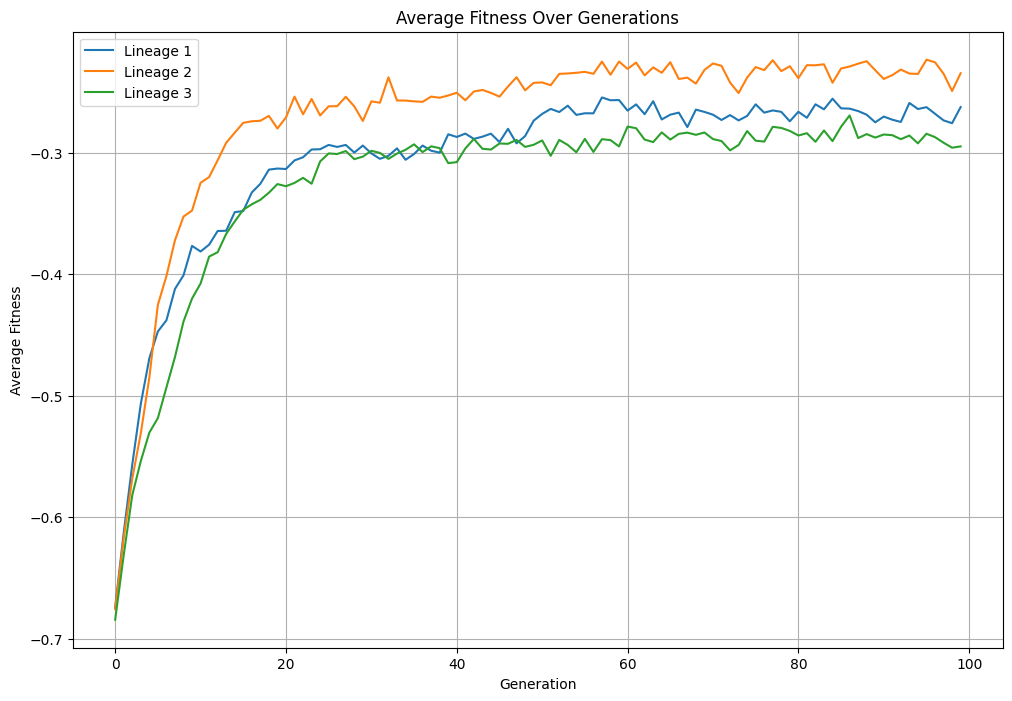

In [ ]:
def plot_average_fitness_per_lineage(fitness_histories):
    plt.figure(figsize=(12, 8))

    for lineage_idx, fitness_history in enumerate(fitness_histories):
        average_fitness_per_generation = []

        num_generations = len(fitness_history[0]) if fitness_history else 0
        for gen_idx in range(num_generations):
            generation_fitnesses = []
            for island_fitness in fitness_history:
                if gen_idx < len(island_fitness):
                    generation_fitnesses.extend(island_fitness[gen_idx])
            avg_fitness = np.mean(generation_fitnesses) if generation_fitnesses else 0
            average_fitness_per_generation.append(avg_fitness)
        
        plt.plot(
            average_fitness_per_generation,
            label=f"Lineage {lineage_idx + 1}"
        )
    
    plt.xlabel("Generation")
    plt.ylabel("Average Fitness")
    plt.title("Average Fitness Over Generations")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_fitness_per_lineage(fitness_histories)